In [1]:
from threshold import MultiStairCase
import matplotlib.pyplot as plt
import numpy as np

## Function used to simulate data

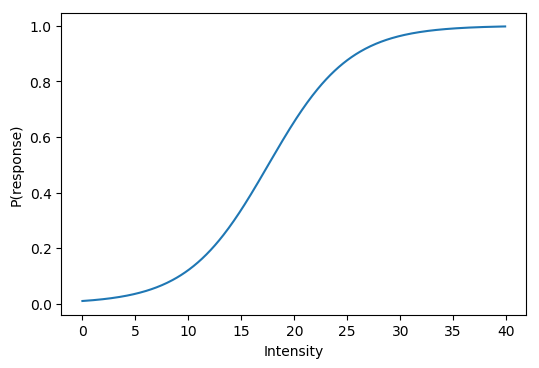

In [2]:
x = np.arange(0, 40, 0.1)
y = MultiStairCase.func(x, 100, 1.3)
plt.figure(dpi=100)
plt.xlabel("Intensity")
plt.ylabel("P(response)")
plt.plot(x, y);

## Create multistaircase object

Default is 2 interleaved estimators, here we set to run 40 trials per estimator with a starting value of 20

In [3]:
multistair = MultiStairCase(40, 20)

## Run "trials" with simulated responses

In [4]:
for n, stim_level in enumerate(multistair):

    print("Calibration trial {0} / {1} | " \
          "Stimulation level = {2}".format(n + 1, 80, stim_level))

    response = MultiStairCase.func(stim_level, 100, 1.3)

    multistair.add_response((np.random.random(1) < response).astype(int)[0])


Calibration trial 1 / 80 | Stimulation level = 20
Calibration trial 2 / 80 | Stimulation level = 20
Calibration trial 3 / 80 | Stimulation level = 15.0
Calibration trial 4 / 80 | Stimulation level = 25.0
Calibration trial 5 / 80 | Stimulation level = 10.0
Calibration trial 6 / 80 | Stimulation level = 25.0
Calibration trial 7 / 80 | Stimulation level = 5.0
Calibration trial 8 / 80 | Stimulation level = 23.3333333333
Calibration trial 9 / 80 | Stimulation level = 0.0
Calibration trial 10 / 80 | Stimulation level = 23.3333333333
Calibration trial 11 / 80 | Stimulation level = 0
Calibration trial 12 / 80 | Stimulation level = 24.3333333333
Calibration trial 13 / 80 | Stimulation level = 0
Calibration trial 14 / 80 | Stimulation level = 24.3333333333
Calibration trial 15 / 80 | Stimulation level = 0
Calibration trial 16 / 80 | Stimulation level = 23.619047619
Calibration trial 17 / 80 | Stimulation level = 0.0
Calibration trial 18 / 80 | Stimulation level = 22.369047619
Calibration trial 1

## Fit a curve to the data and get thresholds

In [5]:
multistair.fit()
p25 = multistair.invert(0.25)
p25 = multistair.invert(0.5)
p25 = multistair.invert(0.75)

## Plot things

### Thresholds

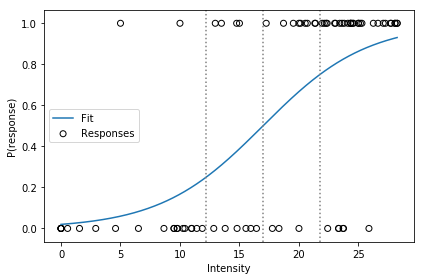

In [6]:
multistair.plot([0.25, 0.5, 0.75])

### Comparison of fitted curve to function used to generate responses

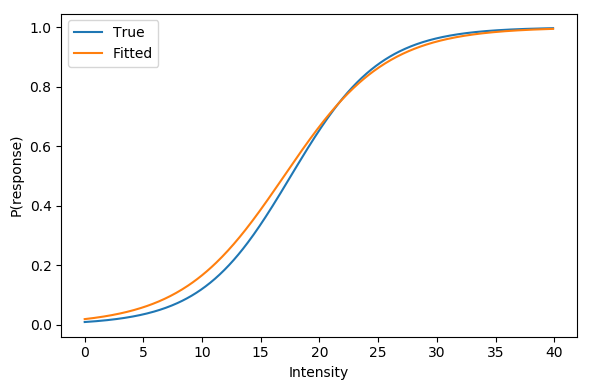

In [7]:
x = np.arange(0, 40, 0.1)
y = MultiStairCase.func(x, 100, 1.3)
y2 = MultiStairCase.func(x, *multistair.popt)
plt.figure(dpi=100)
plt.xlabel("Intensity")
plt.ylabel("P(response)")
plt.plot(x, y, label='True')
plt.plot(x, y2, label='Fitted')
plt.legend()
plt.tight_layout();